**🔹 코랩 환경 : 한글 깨짐 방지**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

**어플 사용 문제점/개선방안 도출하기**

1. Py-Hanspell : 맞춤법 보정 
2. 특수문자, "@%*=()/+ 와 같은 문장부호 제거 
3. 토큰화 : konlpy okt
4. 불용어 처리 
5. 워드 클라우드, 빈도어 

**연도별로 등장한 문제점 확인 : 개선된 부분 파악/ 문제점 파악**


* https://wikidocs.net/92961
* https://ebbnflow.tistory.com/246


#### 1️⃣ app store review

* 데이터 개수가 적음 (총 50개)
* 2020,21년도 리뷰 수 빈도가 가장 많음 + 부정 리뷰가 대부분 
* 제목 기입란이 존재하여 불만족/만족 요인 빠르게 파악 가능했음 

##### 1.데이터 불러오기

In [ ]:
import pandas as pd 
ios = pd.read_csv('ios_review.csv')
ios.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
import datetime
ios['날짜'] = ios['날짜'] .astype(str)
ios['날짜']  = pd.to_datetime(ios['날짜'])
ios['연도'] = ios['날짜'].dt.year
ios['월'] = ios['날짜'].dt.month 
ios['요일'] = ios['날짜'].dt.dayofweek

In [ ]:
ios['sentiment'] = 3
for i in range(len(ios)) : 
  if ios['별점'][i] <= 3 : 
    ios['sentiment'][i] = 0 # 부정 
  
  else : 
    ios['sentiment'][i] = 1 # 긍정 

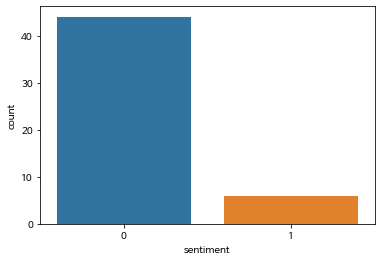

In [24]:
ax = sns.countplot(x="sentiment", data=ios) # 부정리뷰가 압도적으로 많음 

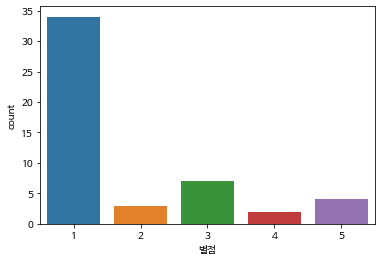

In [23]:
ax = sns.countplot(x="별점", data=ios)

In [26]:
ios[ios['sentiment']==1]['리뷰']

# 긍정 요인 : 도서관/체육관 카드 통합 지원 서비스, 할인쿠폰

# 점수는 높지만 리뷰 내용은 불만족인 경우 존재 

0     도서관 다닐 때 카드 안들고 다녀서 좋아요 위젯 생기면 더 편해질 것 같아요 ios...
1     소소한 할인쿠폰도 많이 주는것같고 \n서울시 공공시설 이용할때 하나로 쓸수 있어서 ...
28                                    앱하나로 이용이 편리해여 편해요
29    육아종합지원카드 등록하려고 하는데 계속 지연되고 등록이 안되네요.. 시설카드추가왜 ...
44    도서관카드, 문화체육센터 카드 연동하여 꾸준히 잘 사용하던 시민입니다. 금일 갑자기...
47    거주지 입력을 구 주소로 입력하게되어 있는 것이 아쉬워요. \n국가차원에서 도로명주...
Name: 리뷰, dtype: object

In [30]:
ios[ios['sentiment']==1]['리뷰'][1]

'소소한 할인쿠폰도 많이 주는것같고 \n서울시 공공시설 이용할때 하나로 쓸수 있어서 좋은 것 같아요 사용하기 편리해요'

In [32]:
ios[ios['sentiment']==1]['리뷰'][44]

'도서관카드, 문화체육센터 카드 연동하여 꾸준히 잘 사용하던 시민입니다. 금일 갑자기 블루투스 연결하라는 팝업이 뜨면서부터 어플 진입이 불가하네요. 닫기 버튼을 누르면 네트워크 연결을 재확인 하라는 알림 후 앱 종료 되는 오류 발생합니다. 도서 수령하러 갔다가 불편을 겪었네요.. 빠른 확인 부탁드려요.. 진입 오류'

**🔹 날짜 분포 살펴보기** 

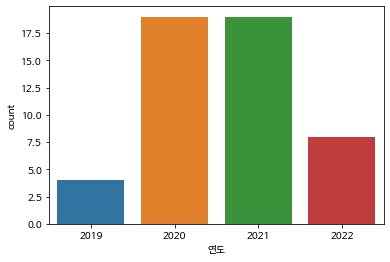

In [16]:
ax = sns.countplot(x="연도", data=ios)

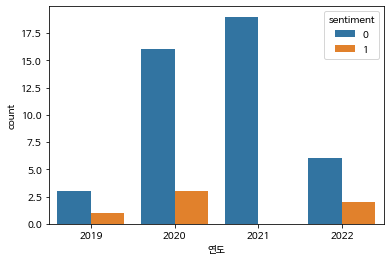

In [17]:
ax = sns.countplot(x="연도", data=ios, hue='sentiment')

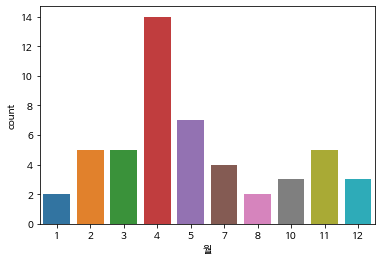

In [18]:
ax = sns.countplot(x="월", data=ios)

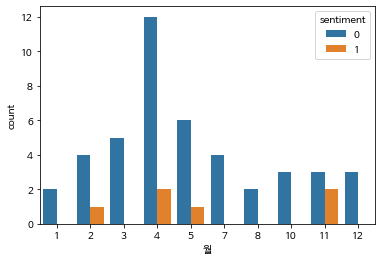

In [19]:
ax = sns.countplot(x="월", data=ios, hue='sentiment')

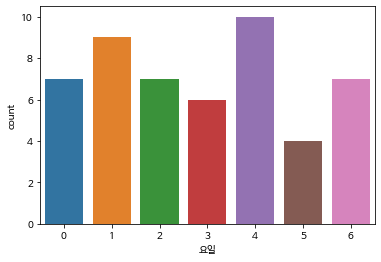

In [20]:
ax = sns.countplot(x="요일", data=ios)

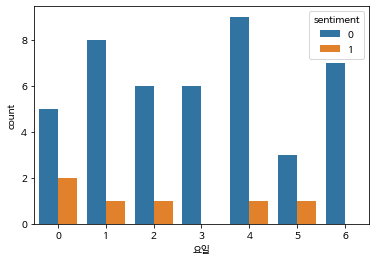

In [21]:
ax = sns.countplot(x="요일", data=ios, hue='sentiment')

##### 2.맞춤법/띄어쓰기 보정

**🔹 맞춤법 및 띄어쓰기 보정**

* Hanspell : 네이버 맞춤법 검사기를 이용한 파이썬용 한글 맞춤법 검사 라이브러리

In [33]:
ios['리뷰'] = ios['리뷰'].apply(lambda x : x.replace("\n"," ")) # 크롤링 과정에서 발생한 \n 문자열 없애기

In [ ]:
pip install git+https://github.com/ssut/py-hanspell.git # 맞춤법 오류 수정 패키지 다운로드 

In [35]:
from hanspell import spell_checker # 맞춤법 오류 수정 
ios['review'] = ios['리뷰'].apply(lambda x : spell_checker.check(x))
ios['review'] = ios['review'].apply(lambda x : x.checked)

In [36]:
ios.리뷰[30] 

'pass 계속하는데 세션갖ㅅ 유효하지않다고 뜨고 보안문자가 숫자없어지고 영어문자만나오는데 아예 영어문자는 입력도 되지도않네요  확인좀하고 앱 올려주셔야죠 오류가 많아보이네요 세션값이 유효하지않데요'

In [37]:
ios.review[30] # 띄어쓰기 및 맞춤법 오류 수정 확인 

'pass 계속하는데 세션갖ㅅ 유효하지 않다고 뜨고 보안 문자가 숫자 없어지고 영어 문자만 나오는데 아예 영어 문자는 입력도 되지도 않네요  확인 좀 하고 앱 올려주셔야죠 오류가 많아 보이네요 세션 값이 유효하지 않데요'

##### 3.텍스트 전처리

**🔹 코랩 환경 konlpy 설치**

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [39]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [40]:
from konlpy.tag import Okt
import re
okt=Okt()

In [41]:
stopwords = ['하다','하고','있다','언제','은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','을','를','에서',
 '한','도','카드','서울','서울시민','서울시민카드','앱','어플리케이션','애플리케이션','ㅠㅠ','ㅋㅋ','ㅎㅎ','이', '있', '하', '것', '들',
  '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하']

In [42]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = True, stop_words =stopwords):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [44]:
#전처리 함수 만들기
def noun(review, okt, remove_stopwords = True, stop_words =stopwords):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.nouns(review_text)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [43]:
ios['token']= ios['review'].apply(lambda x : preprocessing(x, okt))

In [45]:
ios['noun']= ios['review'].apply(lambda x : noun(x, okt))

In [46]:
ios.head(3)

,날짜,싫어요,좋아요,리뷰,별점,연도,월,요일,sentiment,review,token,noun
0,2022-05-07 21:07:58-07:00,0,0,도서관 다닐 때 카드 안들고 다녀서 좋아요 위젯 생기면 더 편해질 것 같아요 ios...,5,2022,5,5,1,도서관 다닐 때 카드 안 들고 다녀서 좋아요 위젯 생기면 더 편해질 것 같아요 io...,"[도서관, 다니다, 안, 들다, 다니다, 좋다, 위젯, 생기, 면, 더, 편하다, ...","[도서관, 안, 위젯, 생기, 더, 위젯]"
1,2022-04-04 20:37:15-07:00,0,0,소소한 할인쿠폰도 많이 주는것같고 서울시 공공시설 이용할때 하나로 쓸수 있어서 좋...,5,2022,4,0,1,소소한 할인쿠폰도 많이 주는 것 같고 서울시 공공시설 이용할 때 하나로 쓸 수 있...,"[소소하다, 할인, 쿠폰, 많이, 주다, 같다, 서울시, 공공시설, 이용, 하나로,...","[할인, 쿠폰, 서울시, 공공시설, 이용, 하나로, 사용]"
2,2022-03-29 18:16:54-07:00,0,0,아래에 저 같은 분이 계시던데 저두 문자로 인증하려구 하니 쿠키 제한에 걸려 본인 ...,1,2022,3,1,0,아래에 저 같은 분이 계시던데 저도 문자로 인증하려고 하니 쿠키 제한에 걸려 본인 ...,"[아래, 에, 저, 같다, 분, 계시다, 저, 문자, 로, 인증, 하니, 쿠키, 제...","[아래, 저, 분, 저, 문자, 인증, 하니, 쿠키, 제한, 본인, 문자, 인증, ..."


##### 4.워드클라우드

In [48]:
words = [] 

for i in ios['token'] : 
  for j in i : 
    words.append(j)


In [ ]:
remove_one_word = [x for x in words if len(x)>1] # 두글자 이상의 단어만 추출 

In [51]:
from collections import Counter
frequent = Counter(remove_one_word).most_common() # 빈도 계산

In [52]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

{'인증': 44, '안되다': 27, '되다': 20, '문자': 18, '도서관': 17, '뜨다': 17, '본인': 16, '가입': 16, '돼다': 15, '않다': 14, '어플': 13, '발급': 13, '확인': 13, '계속': 13, '세션': 12, '입력': 12, '회원': 12, '시민': 11, '이용': 10, '없다': 10, '만들다': 9, '쿠키': 8, '유효하다': 8, '부탁드리다': 7, '아이폰': 7, '버튼': 7, '오류': 7, '같다': 6, '이다': 6, '받다': 6, '되어다': 6, '업데이트': 6, '넘어가다': 6, '다시': 6, '나오다': 6, '부터': 6, '으로': 6, '접속': 6, '수가': 5, '라는': 5, '에러': 5, '나다': 5, '라고': 5, '해주다': 5, '문제': 5, '누르다': 5, '발생': 5, '메시지': 5, '사용': 4, '제한': 4}




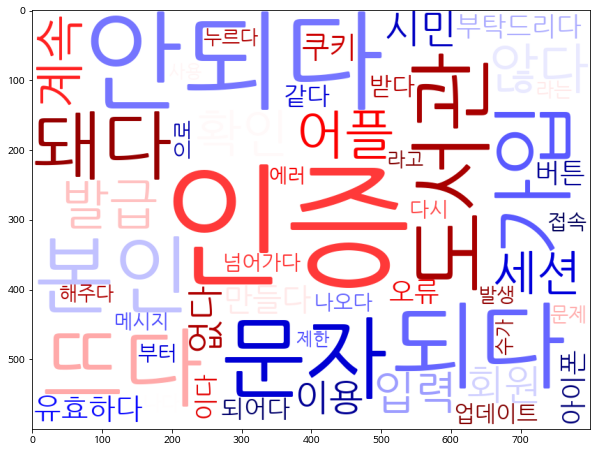

In [54]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

# 인증, 안되다, 발급, 세션, 오류, 본인확인문자,  쿠키 설정 관련 오류

##### 5.워드클라우드 - 명사 

In [55]:
words = [] 

for i in ios['noun'] : 
  for j in i : 
    words.append(j)


In [56]:
remove_one_word = [x for x in words if len(x)>1] # 두글자 이상의 단어만 추출 

In [57]:
from collections import Counter
frequent = Counter(remove_one_word).most_common() # 빈도 계산

{'인증': 44, '문자': 18, '도서관': 17, '본인': 16, '가입': 16, '어플': 13, '발급': 13, '확인': 13, '계속': 13, '세션': 12, '입력': 12, '회원': 12, '시민': 11, '이용': 10, '쿠키': 8, '아이폰': 7, '버튼': 7, '오류': 7, '업데이트': 6, '다시': 6, '접속': 6, '수가': 5, '에러': 5, '문제': 5, '발생': 5, '메시지': 5, '사용': 4, '제한': 4, '절차': 4, '대응': 4, '수정': 4, '종료': 4, '실행': 4, '서울시': 3, '하니': 3, '개선': 3, '만료': 3, '진행': 3, '시도': 3, '휴대폰': 3, '추가': 3, '번호': 3, '삭제': 3, '해결': 3, '통합': 3, '오늘': 3, '모든': 3, '세금': 3, '인식': 3, '불가': 3}




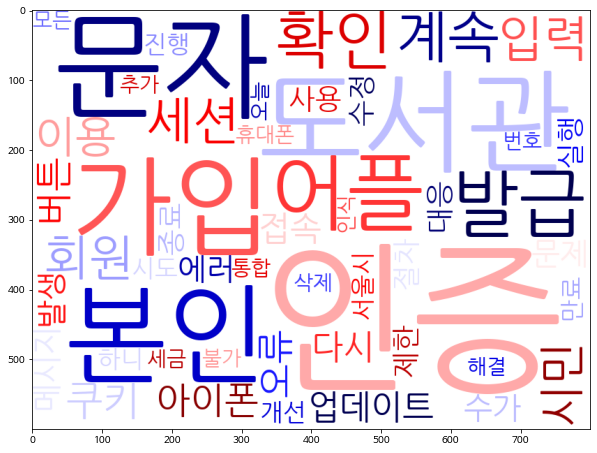

In [58]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

# 인증, 안되다, 발급, 세션, 오류, 본인확인문자,  쿠키 설정 관련 오류

#### 2️⃣ play store review


##### 1.데이터 불러오기

In [70]:
import pandas as pd 
play = pd.read_csv('playstore_review.csv')
play.drop('Unnamed: 0', inplace=True, axis=1)

In [71]:
import datetime
play['날짜'] = play['날짜'] .astype(str)
play['날짜']  = pd.to_datetime(play['날짜'])
play['연도'] = play['날짜'].dt.year
play['월'] = play['날짜'].dt.month 
play['요일'] = play['날짜'].dt.dayofweek

In [ ]:
play['sentiment'] = 3
for i in range(len(play)) : 
  if play['별점'][i] <= 3 : # 3점 이하는 부정 감정으로 분류 
    play['sentiment'][i] = 0 # 부정 
  
  else : 
    play['sentiment'][i] = 1 # 긍정 

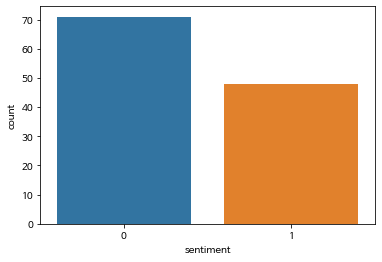

In [84]:
ax = sns.countplot(x="sentiment", data=play)  

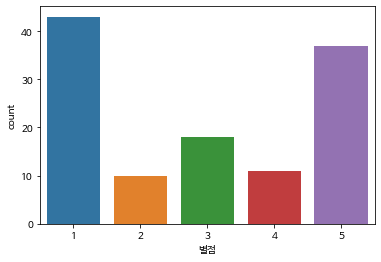

In [86]:
ax = sns.countplot(x="별점", data=play)

In [87]:
play[play['sentiment']==1]['리뷰'] 

1      이런 시도 넘 좋아요. 매번 쓰는 게 아닌데 실물 카드 들고 다니는 게 진짜 귀찮았...
2      반납 연장을 어플 내에서 할 수 있으면 좋겠어요. 힘들면 그냥 사이트에서 연장한 거...
3      잘 쓰고 있습니다! 공공기관뿐만 아니라 서울시에 있는 일반 상점들도 등록해서 사용하...
5      도서관카드 발급하고 가지고 다니기 힘들어 불편했는데 안가지고 다닐수 있어서 편하네요...
6      도서관이나 미술관 이용시 매번 출입카드를 들고가거나 공연정보를 알기위해 일일이 찾아...
18     앱 처음 실행시 알림창 일주일간 나오지 않도록 선택할수 있게 해주시고, 회원번호 바...
22     버스에서 홍보영상 보고 설치했는데 쓰임새가 많을것같네요 사용하다 불편한점 있으면 문...
30     본인인증이 자꾸 실패하는데 브라우저 설정 내 쿠키활용을 제한했냐는게 무슨 말인가요....
37                            이용 범위와 혜택이 많아요^^진작 알았으면...
40     모범납세자랑 똑같이 일반인들도 똑같이 혜택주세요 일반인 들은 조금 섭섭하네요...♥...
42     버스에서 나오는 TV보고 가입했어요. 카드 없어도 되서 지갑이 얇아 지고 좋을것 같아요.
47                         서울의 모든 편의시설에 접근이 용이합니다 강추드립니다
52     도서관 카드 찾아다니느라 진땀 뺐는데 넘 좋아요♥ 반납일 언제인지 어디서 뭐 빌렸는...
53                                     여러 도서관 이용이 편리해요 ~
63                                   굿 좋아요 내카드 다 모아서 편해요
64                                          편리해서 좋았어요~^^
66                                        태블릿에서도 되게 헤주세요
67                             

**🔹 날짜 분포 살펴보기** 

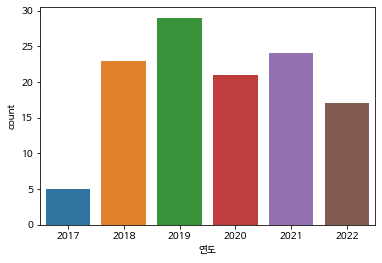

In [88]:
ax = sns.countplot(x="연도", data=play)

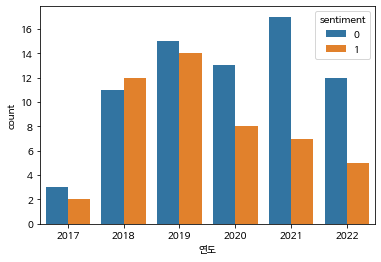

In [89]:
ax = sns.countplot(x="연도", data=play, hue = "sentiment")

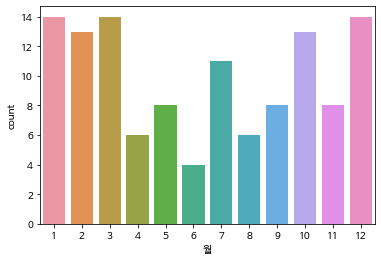

In [90]:
ax = sns.countplot(x="월", data=play)

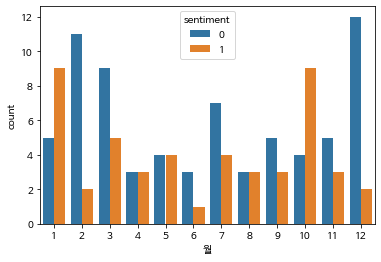

In [91]:
ax = sns.countplot(x="월", data=play, hue = "sentiment")

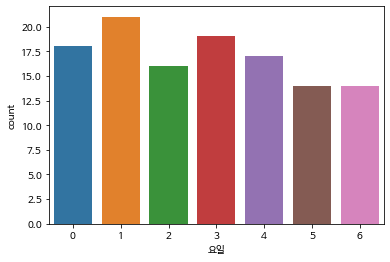

In [92]:
ax = sns.countplot(x="요일", data=play)

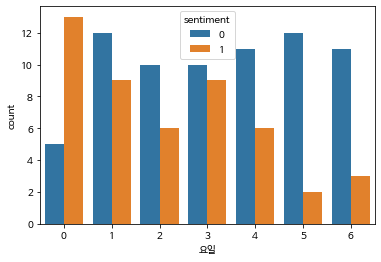

In [93]:
ax = sns.countplot(x="요일", data=play, hue = "sentiment")

##### 2.맞춤법/띄어쓰기 보정

In [94]:
play['리뷰'][23]

'강서구 통합도서관 가입신청을 하려는데, 정회원 신청에 실패하였습니다. 잠시후에 다시 이용해주세요.라고 오류메시지가 뜹니다. 해결 부탁 드려요.'

In [95]:
from hanspell import spell_checker
play['review'] = play['리뷰'].apply(lambda x : spell_checker.check(x))
play['review'] = play['review'].apply(lambda x : x.checked)

In [96]:
play.review[23]

'강서구 통합도서관 가입신청을 하려는데, 정회원 신청에 실패하였습니다. 잠시 후에 다시 이용해주세요.라고 오류메시지가 뜹니다. 해결 부탁드려요.'

##### 3.텍스트 전처리

In [97]:
play['token']= play['review'].apply(lambda x : preprocessing(x, okt))

In [98]:
play['noun']= play['review'].apply(lambda x : noun(x, okt))

##### 4.워드클라우드 

In [99]:
words = [] 

for i in play['token'] : 
  for j in i : 
    words.append(j)



In [ ]:
remove_one_word = [x for x in words if len(x)>1]

In [ ]:
from collections import Counter
frequent = Counter(remove_one_word).most_common()

{'도서관': 31, '되다': 31, '안되다': 24, '좋다': 22, '없다': 21, '인증': 17, '뜨다': 16, '가입': 14, '사용': 13, '시설': 13, '등록': 12, '나오다': 12, '돼다': 11, '이용': 11, '아니다': 11, '자다': 11, '연동': 11, '해주다': 11, '으로': 11, '깔다': 10, '같다': 9, '통합': 9, '많다': 9, '설치': 9, '연장': 8, '계속': 8, '만들다': 8, '시민': 8, '본인': 8, '라고': 7, '쓰다': 7, '어플': 7, '반납': 7, '오다': 7, '쿠폰': 7, '다른': 6, '이렇다': 6, '어떻다': 6, '모르다': 6, '예약': 6, '공공': 6, '회원': 6, '하나요': 6, '시도': 5, '빌리다': 5, '대여': 5, '목록': 5, '하나': 5, '정말': 5, '발급': 5}




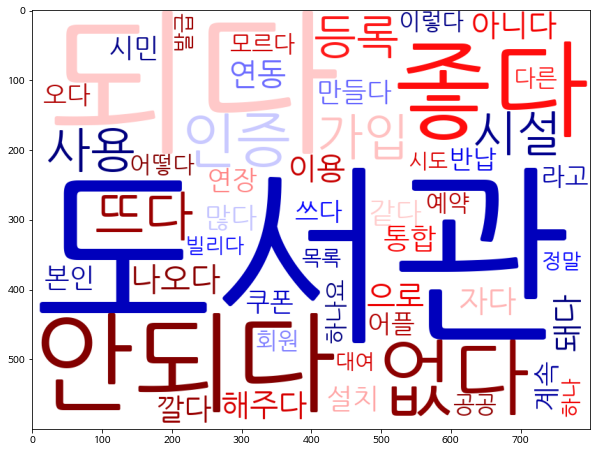

In [104]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

# 인증, 안되다, 발급, 세션, 오류, 본인확인문자,  쿠키 설정 관련 오류

In [105]:
positive = play[play['sentiment']==1]
negative = play[play['sentiment']==0]

🔹 긍정 리뷰 워드클라우드 

In [106]:
words = [] 

for i in positive['token'] : 
  for j in i : 
    words.append(j)

remove_one_word = [x for x in words if len(x)>1]
frequent = Counter(remove_one_word).most_common()

{'좋다': 21, '자다': 8, '사용': 7, '많다': 6, '이용': 6, '도서관': 5, '알다': 5, '무료': 5, '너무': 4, '들다': 4, '다니다': 4, '빌리다': 4, '없다': 4, '정말': 4, '혜택': 4, '시민': 4, '시도': 3, '쓰다': 3, '어플': 3, '대여': 3, '어떻다': 3, '반납': 3, '돼다': 3, '서울시': 3, '나오다': 3, '가지': 3, '같다': 3, '커피': 3, '시설': 3, '영화': 3, '으로': 3, '이렇다': 2, '매번': 2, '아니다': 2, '싶다': 2, '가능하다': 2, '써다': 2, '모르다': 2, '감사하다': 2, '연장': 2, '힘들다': 2, '계속': 2, '뜨다': 2, '공공기관': 2, '등록': 2, '따로': 2, '설치': 2, '지갑': 2, '없이': 2, '불편하다': 2}




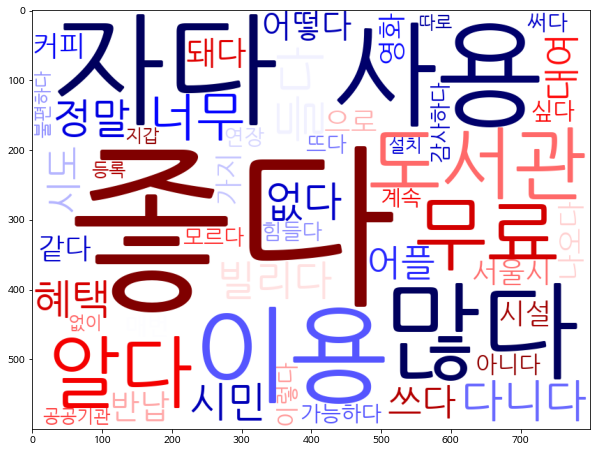

In [107]:
words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

🔹 자다 : 토큰화가 잘 이루어지지 않음 

In [170]:
positive.reset_index(inplace=True)

In [177]:
for i in range(len(positive)) :
  if '자다' in positive['token'][i] :
    print(i,positive['token'][i])

2 ['자다', '쓰다', '공공기관', '뿐', '만', '아니다', '서울시', '에', '일반', '상점', '등록', '사용', '건', '어떻다', '요', '프랜차이즈', '각자', '작다', '가게', '없다', '그거', '하나', '때문', '에', '따로', '설치', '번거롭다', '요새', '모바일', '신분증', '나오다', '정말', '지갑', '없이', '다니다', '싶다']
4 ['도서관', '이나', '미술관', '이용', '시', '매번', '출입', '들다', '가다', '공', '연', '정보', '알다', '위해', '일일이', '찾아보다', '이렇게', '번', '에', '볼', '어플', '로', '걸', '일찍', '알다', '공공기관', '더', '자다', '활용', '텐데', '왜', '아무', '모르다', '너무', '아쉽다']
17 ['자다', '사용']
18 ['자다', '사용']
20 ['서울시', '중', '에', '제일', '자다', '함']
26 ['자다', '사용']
30 ['공공', '사서', '차다', '자다']
38 ['어제', '알', '게', '되어다', '깔다', '자다', '써다', '오늘', '아침', '부터', '네트워크', '연결', '상태', '확인', '하라', '며', '접속', '안되다', 'ㅜㅜ', '어찌', '하나요', '접속', '시간', '정해지다']


In [179]:
positive['리뷰'][26] # 잘 -> 자다

'잘 사용하고 있습니다.'

In [180]:
positive['리뷰'][17] # 잘 -> 자다

'잘사용하겠습니다^^'

🔹 부정 리뷰 워드클라우드 

In [108]:
words = [] 

for i in negative['token'] : 
  for j in i : 
    words.append(j)

remove_one_word = [x for x in words if len(x)>1]
frequent = Counter(remove_one_word).most_common()

{'되다': 29, '도서관': 26, '안되다': 23, '없다': 17, '인증': 16, '뜨다': 14, '가입': 12, '연동': 11, '등록': 10, '시설': 10, '통합': 9, '해주다': 9, '깔다': 9, '나오다': 9, '아니다': 9, '돼다': 8, '으로': 8, '라고': 7, '설치': 7, '본인': 7, '같다': 6, '다른': 6, '연장': 6, '예약': 6, '계속': 6, '오다': 6, '쿠폰': 6, '사용': 6, '만들다': 6, '이용': 5, '신청': 5, '회원': 5, '해도': 5, '삭제': 4, '반납': 4, '쓰다': 4, '발급': 4, '공공': 4, '서비스': 4, '시민': 4, '않다': 4, '날짜': 4, '해결': 4, '전화': 4, '하나': 4, '모르다': 4, '확인': 4, '남기다': 4, '이렇다': 4, '건가': 4}




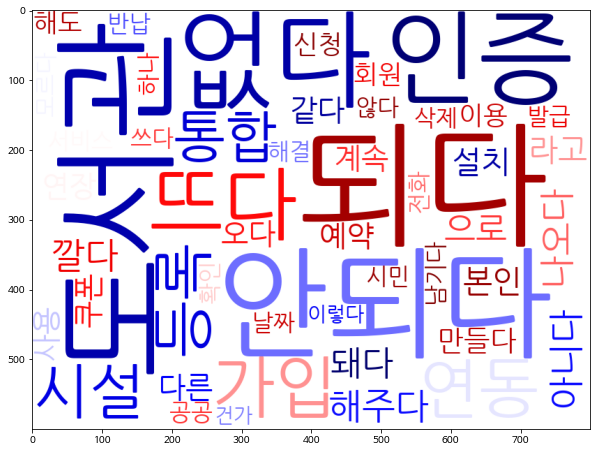

In [109]:
words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

##### 5.워드클라우드 - 명사 

In [110]:
words = [] 

for i in play['noun'] : 
  for j in i : 
    words.append(j)


In [111]:
remove_one_word = [x for x in words if len(x)>1] # 두글자 이상의 단어만 추출 

In [112]:
from collections import Counter
frequent = Counter(remove_one_word).most_common() # 빈도 계산

{'도서관': 31, '인증': 17, '가입': 14, '사용': 13, '시설': 13, '등록': 12, '이용': 11, '연동': 11, '통합': 9, '설치': 9, '연장': 8, '계속': 8, '시민': 8, '본인': 8, '어플': 7, '반납': 7, '쿠폰': 7, '다른': 6, '예약': 6, '회원': 6, '하나요': 6, '시도': 5, '대여': 5, '목록': 5, '하나': 5, '정말': 5, '발급': 5, '신청': 5, '확인': 5, '혜택': 5, '자꾸': 5, '해도': 5, '할인': 5, '무료': 5, '선택': 4, '경우': 4, '진짜': 4, '사이트': 4, '서울시': 4, '삭제': 4, '다시': 4, '서비스': 4, '날짜': 4, '해결': 4, '전화': 4, '건가': 4, '실행': 3, '기능': 3, '때문': 3, '지연': 3}




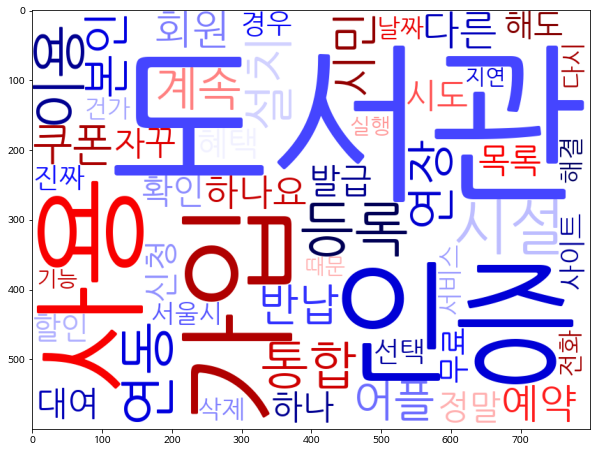

In [113]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

# 인증, 안되다, 발급, 세션, 오류, 본인확인문자,  쿠키 설정 관련 오류

#### 3️⃣ play store - 개발자 응답

In [114]:
develop = play[['응답날짜','응답','별점','연도','월','sentiment']]

In [115]:
develop.head(2)

,응답날짜,응답,별점,연도,월,sentiment
0,2019-01-29 06:51:02,안녕하세요. 서울시민카드입니다.\n\n통합 회원으로 서비스하는 도서관이 늘고 있어 ...,3,2018,12,0
1,2020-12-11 05:08:21,안녕하세요. 서울시민카드 입니다. 리뷰 감사드립니다.,5,2020,11,1


In [ ]:
develop.dropna(inplace=True)

In [ ]:
develop['응답'] = develop['응답'].apply(lambda x : x.replace("\n"," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("안녕하세요. 서울시민카드입니다."," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("소중한 리뷰 감사드립니다."," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("안녕하세요."," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("서울시민 카드입니다."," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("사용에 불편을 드려 죄송합니다."," "))
develop['응답']  = develop['응답'].apply(lambda x : x.replace("고맙습니다."," "))

In [130]:
stopwords = ['하다','하고','있다','언제','은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','을','를','에서',
 '한','도','카드','서울','서울시민','서울시민카드','앱','어플리케이션','애플리케이션','ㅠㅠ','ㅋㅋ','ㅎㅎ','이', '있', '하', '것', '들',
  '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하',
  '시민','도서관','불편','서비스','문의']

In [131]:
#전처리 함수 만들기
def noun(review, okt, remove_stopwords = True, stop_words =stopwords):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.nouns(review_text)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [132]:
develop['token']= develop['응답'].apply(lambda x : noun(x, okt))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
develop['token']

0             [통합, 회원, 늘, 말씀, 주신, 등록, 사용, 준비, 중, 지속, 관심]
1                                               [리뷰, 감사]
2      [자체, 대출, 연장, 기능, 등록, 홈페이지, 자동, 로그인, 접속, 홈페이지, ...
3                                               [리뷰, 감사]
4        [우선, 기간, 주신, 해당, 시설, 월부, 시설, 계, 완료, 현재, 정상, 이용]
                             ...                        
114              [사용, 시설, 혜택, 계속, 추가, 예정, 지속, 관심, 새해, 복]
115    [본인, 인증, 관련, 이상, 동작, 현상, 설명, 주시, 확인, 후, 조치, 새해...
116                  [사용, 시설, 혜택, 계속, 추가, 지속, 관심, 새해, 복]
117                                      [지속, 관심, 새해, 복]
118                                     [사항, 보완, 리뷰, 감사]
Name: token, Length: 116, dtype: object

In [134]:
neg = develop[develop['sentiment'] == 0] 

In [135]:
words = [] 

for i in neg['token'] : 
  for j in i : 
    words.append(j)


{'확인': 36, '후': 33, '시설': 31, '우선': 28, '이용': 25, '사용': 24, '인증': 21, '본인': 19, '정보': 18, '고객': 16, '센터': 16, '처리': 16, '관련': 16, '회원': 15, '문제': 15, '대해': 14, '해당': 13, '현재': 13, '감사': 13, '계속': 12, '발생': 12, '시': 12, '더': 12, '주시': 12, '리뷰': 12, '좀': 10, '지속': 9, '관심': 9, '조치': 9, '제공': 9, '통해': 9, '경우': 9, '부분': 9, '로': 9, '서울시': 9, '시립': 9, '재': 8, '설치': 8, '메뉴': 8, '내용': 8, '위해': 8, '나이스': 8, '용평': 8, '통합': 7, '등록': 7, '삭제': 7, '나은': 7, '게시판': 6, '민카': 6, '사항': 6}




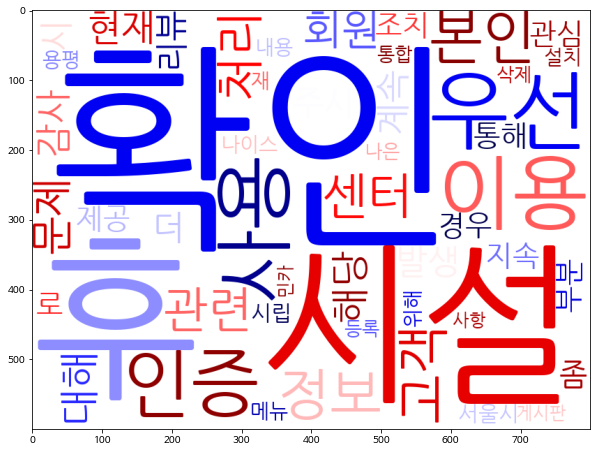

In [136]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(words).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

In [141]:
neg.응답.index

Int64Index([  0,   4,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
             19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  31,  32,  33,
             34,  35,  36,  38,  39,  41,  43,  44,  45,  46,  48,  49,  50,
             51,  54,  55,  56,  57,  58,  59,  60,  61,  62,  65,  70,  72,
             75,  76,  79,  82,  83,  86,  89,  91,  95, 100, 102, 103, 106,
            112, 113, 114, 115, 118],
           dtype='int64')

In [143]:
neg.응답[10]

'  서비스 사용에 불편을 끼쳐드려 죄송합니다. 현재 일부 시설에서 연계오류로 인하여 사용이 불가한 상태입니다. 서울시민카드앱에서 상단 오른쪽 메뉴-고객센터-1:1 문의를 통해 해당시설 및 오류내용 기재해주시면 확인하여 답변 드리도록 하겠습니다. 감사합니다.'

In [144]:
neg.응답[11]

'  서울시민카드 입니다. 우선 불편을 드려 죄송합니다. 앱 삭제 후 재설치 해보신 후 동일한 문제가 계속 발생 시 1:1문의 게시판(우측 상단 메뉴(≡) → 고객센터 → 1:1문의)을 통해 문의 주세요. 문의 주실때 시설명등 상세 정보를 기재해주시면 좀 더 빠르게 처리가 가능하십니다. 감사합니다.'

In [145]:
neg.응답[21]

'  서울시민카드 입니다. 관련 내용에 대해서는 확인 후 빠른 처리 하도록 하겠습니다. 감사합니다.'

In [146]:
neg.응답[45]

'  서울시민카드 입니다. 우선 불편을 드려 죄송합니다. 해당 부분에 대해서는 확인이 되지 않고 있습니다. 같은 문제가 계속 발생 시 1:1문의 게시판을 통해 문의주세요. 감사합니다.'

In [147]:
neg.응답[58]

'   우선 이용에 불편을 드려 죄송합니다.  연동이 안되시는 시설 문의 주시면 확인 후 조치하겠습니다.  리뷰 감사드립니다.'

In [148]:
neg.응답[115]

'     번거로우시겠지만 본인 인증 관련하여 이상 동작 현상을 설명해 주시면 확인 후 조치하도록 하겠습니다.    새해 복 많이 받으세요.'

In [149]:
neg.응답[86]

'  서울시민카드 입니다. 우선 불편을 드려 죄송합니다. 해당 부분에 대해서는 현재 확인이 되지 않고 있습니다. 같은 문제가 계속 발생 시 본인인증 관련해서는 (주)나이스신용평가정보 고객센터 (1600-1522)로 문의 주시면 좀 더 빠르게 처리가 가능하십니다. 감사합니다.'

In [152]:
neg.응답[65]

'  서울시민카드 입니다. 관련 내용에 대해서는 확인 후 빠른 처리 하도록 하겠습니다. 감사합니다.'